# Пользовательские функции

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy import stats as st

from IPython.core.display import HTML

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 10
#pd.options.display.max_columns = 50
pd.options.mode.chained_assignment = None

In [ ]:
def num_quick_view(column):
    '''
    Функция вывода общей информации о столбце с числовыми данными.
    Выводимый массив уникальных значений отсортирован, поэтому первое и последнее значение массива
    является минимумом и максимум значений столбца соответственно.
    '''
    print(np.sort(column.unique()))
    if isinstance(column[1], float):
        if column.apply(lambda x: x%1 != 0).sum() == 0:
            print('Дробная часть всех значений равна нулю')
        else:
            print('Дробная часть НЕ всех значений равна нулю')

Примеры:

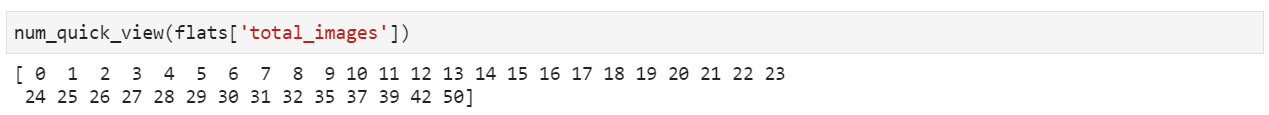

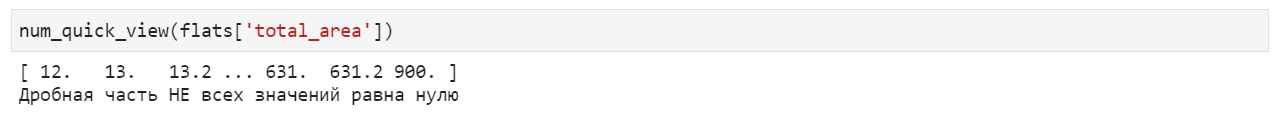

In [ ]:
def value_counts_percent(column, ret=False):
    '''
    Функция вывода количества и процента от общего числа значений столбца
    '''
    temp_df = pd.DataFrame({
                'count':column.value_counts(),
                'percent': column.value_counts() / len(column) * 100})

    if ret: return temp_df
    else: print(temp_df)

Пример:

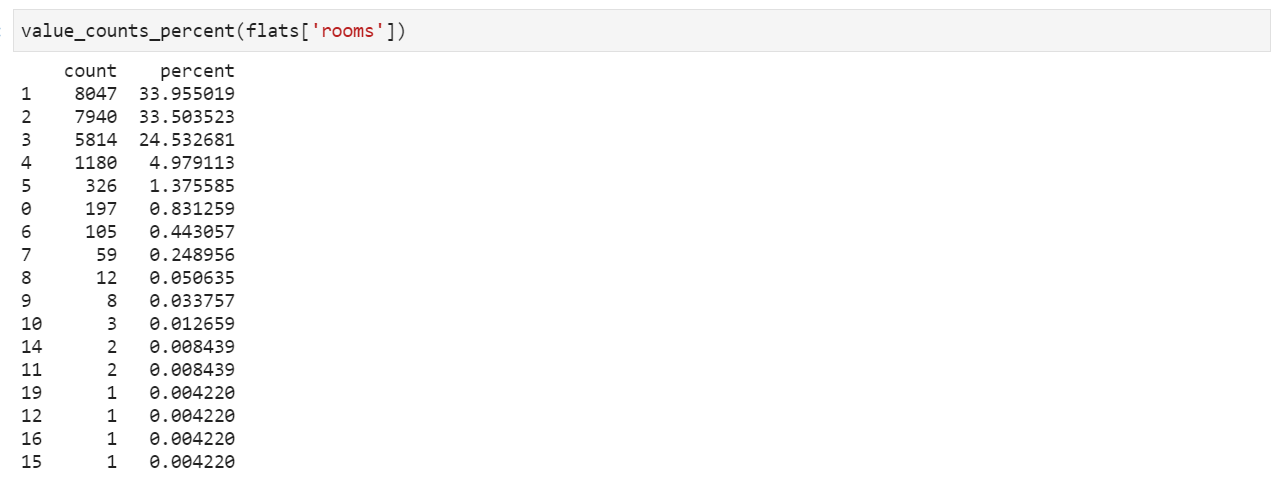

In [ ]:
def null_counts_percent(column):
    '''
    Функция вывода количества и процента от общего числа NAN значений столбца
    '''
    print('count:', column.isna().sum())
    print('percent:', column.isna().sum() / flats.shape[0] * 100)

Пример:

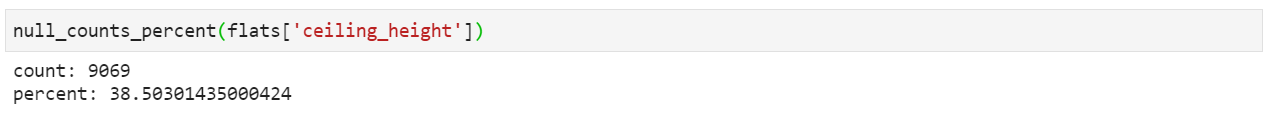

In [ ]:
def hists(column, bottom_count_hists, bins=10, ranges=[], figsize=(15,5)):
    '''
    Функция вывода двух строк гистограмм по столбцу данных -- верхняя гистограмма по всему диапазону данных, 
    нижние -- с ограничениями
    
    column, Pandas.Series - исследуемый столбец
    bottom_count_hists, int64 - количество гистограмм в нижней строке
    bins, int64 - количество корзин гистограмм
    ranges, [tuple(int64, int64), ...] - границы нижних гистограмм
    
    '''
    if bottom_count_hists == 0:
        column.hist(bins=bins, figsize=figsize)
    else:
        fig = plt.figure(constrained_layout=True, figsize=figsize)
        
        gs = GridSpec(2, bottom_count_hists, figure=fig)
        
        hists = [plt.subplot(gs.new_subplotspec((0, 0), colspan=bottom_count_hists))]
        hists[0].hist(column, bins=bins)
    
        for i in range(0, bottom_count_hists):
            hists.append(plt.subplot(gs.new_subplotspec((1, i), colspan=1)))
            hists[i+1].hist(column, bins=bins, range=ranges[i])
    
    plt.show()

Пример:

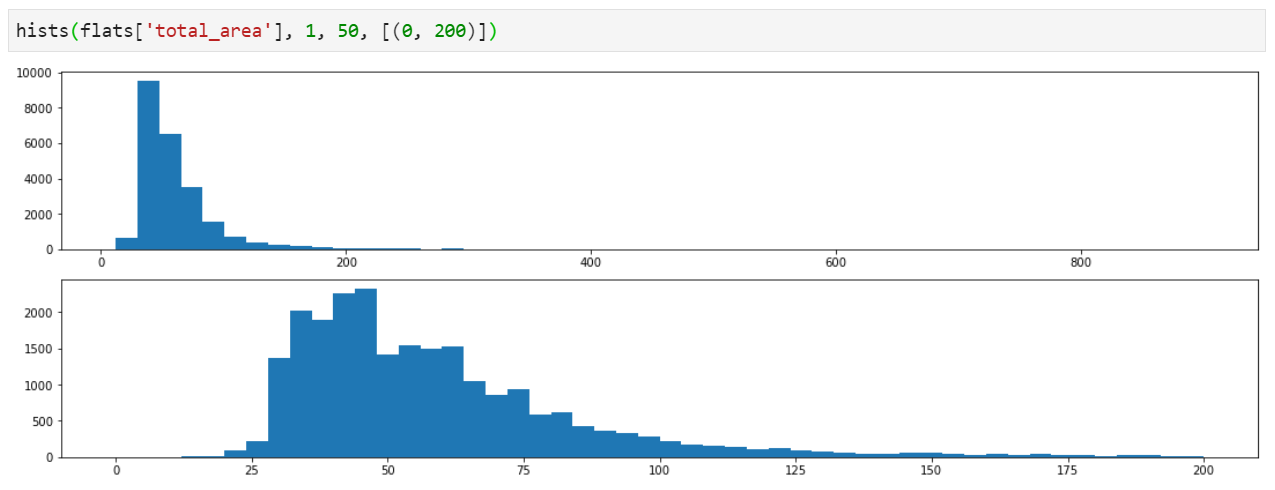

In [ ]:
def rare_out_plot(column, figsize=(15,5)):
    '''
    Функция вывода графиков выбивающихся и редких значений
    
    '''
    fig = plt.figure(constrained_layout=True, figsize=figsize)
    gs = GridSpec(1, 2, figure=fig)
    
    plot_1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=1))
    plot_2 = plt.subplot(gs.new_subplotspec((0, 1), colspan=1))
    
    tmp_df = column.sort_values().reset_index(drop=True)
    step = 100 / tmp_df.shape[0]
    tmp_df.index = [i * step for i in range(0, tmp_df.shape[0])]
    plot_1.plot(tmp_df)
    plot_1.set_title('Выбивающиеся значения')
    plot_1.set_xlabel('Полный набор, %')
    plot_1.set_ylabel('Значения')
   
    tmp_df = value_counts_percent(column, ret=True)
    tmp_df = tmp_df['percent']
    step = 100 / tmp_df.shape[0]
    tmp_df.index = [i * step for i in range(0, tmp_df.shape[0])]
    plot_2.plot(tmp_df)
    plot_2.set_title('Однообразие значений')
    plot_2.set_xlabel('Полный набор, %')
    plot_2.set_ylabel('Повторы значений, %')
    
    plt.show()

Пример:

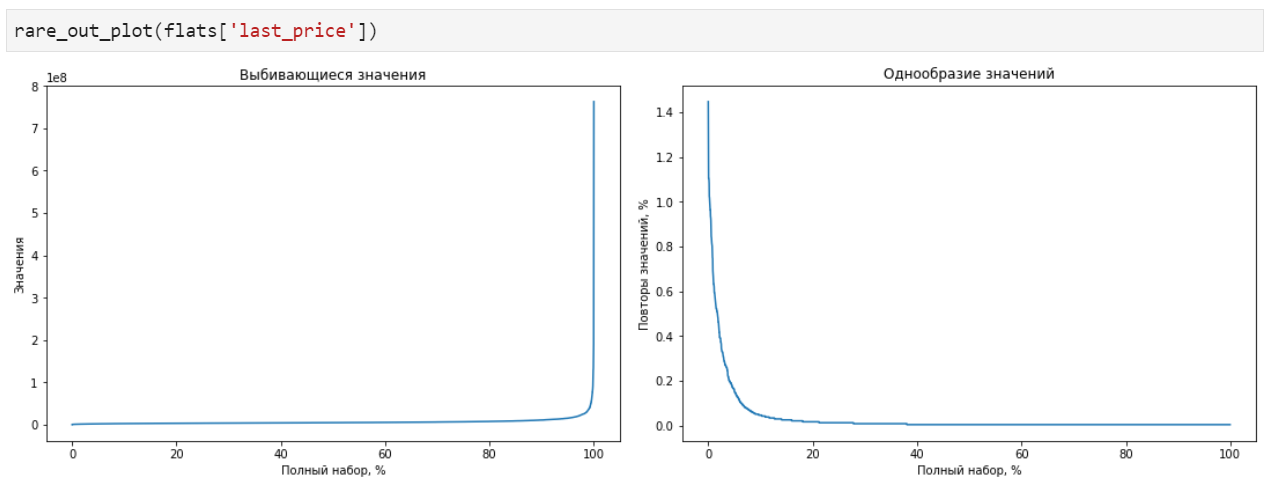

In [ ]:
def check_col_for_index(df, column): # bool
    '''
    Функция проверки совпадения значений столбца со значениями индекса
    '''
    
    count = 0

    for i in df.index:
        if i != df.loc[i, column]: count += 1

    return (count == 0)

Пример:

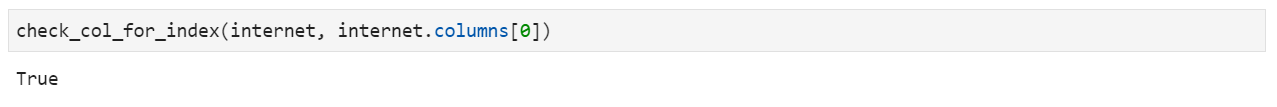

In [ ]:
def draw_graphs(column, SMART_title, ULTRA_title, mesurement):
    
    gs = GridSpec(2, 5, figure=plt.figure(constrained_layout=True, figsize=(15,8)))
    
    graphs = []

    graphs.append(plt.subplot(gs.new_subplotspec((0, 0), colspan=1, rowspan=2)))
    graphs[0].boxplot(users_smart[column])
    graphs[0].set_title(SMART_title)
    graphs[0].set_ylabel(mesurement)

    graphs.append(plt.subplot(gs.new_subplotspec((0, 1), colspan=1, rowspan=2)))
    graphs[1].boxplot(users_ultra[column])
    graphs[1].set_title(ULTRA_title)
    graphs[1].set_ylabel(mesurement)

    graphs.append(plt.subplot(gs.new_subplotspec((0, 2), colspan=2, rowspan=1)))
    graphs[2].hist(users_smart[column], alpha=0.7)
    _mean = users_smart[column].mean()
    _median = users_smart[column].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.75, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.75, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[2].set_title(SMART_title)
    graphs[2].set_xlabel(mesurement)
    graphs[2].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((1, 2), colspan=2, rowspan=1)))
    graphs[3].hist(users_ultra[column], alpha=0.7)
    _mean = users_ultra[column].mean()
    _median = users_ultra[column].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.75, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.75, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[3].set_title(ULTRA_title)
    graphs[3].set_xlabel(mesurement)
    graphs[3].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((0, 4), colspan=1, rowspan=1)))
    graphs[4].scatter(users_smart.index, users_smart[column], alpha=0.3)
    graphs[4].set_title(SMART_title)
    graphs[4].set_xlabel('Пользователи')
    graphs[4].set_ylabel(mesurement)

    graphs.append(plt.subplot(gs.new_subplotspec((1, 4), colspan=1, rowspan=1)))
    graphs[5].scatter(users_ultra.index, users_ultra[column], alpha=0.3)
    graphs[5].set_title(ULTRA_title)
    graphs[5].set_xlabel('Пользователи')
    graphs[5].set_ylabel(mesurement)

    plt.show()

Пример:

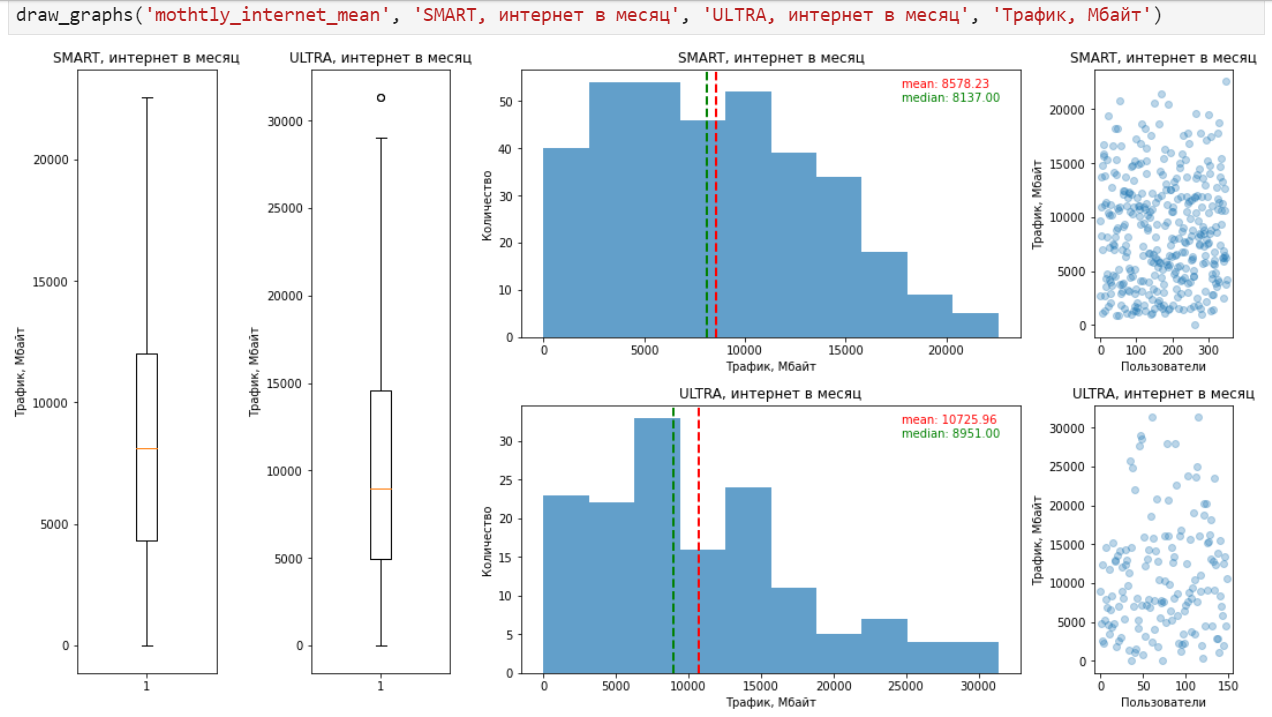

In [ ]:
def peceipt_graphs():

    gs = GridSpec(2, 3, figure=plt.figure(constrained_layout=True, figsize=(15,8)))

    graphs = []

    graphs.append(plt.subplot(gs.new_subplotspec((0, 0), colspan=1, rowspan=1)))
    graphs[0].hist(users_smart['receipt_mean'], alpha=0.7)
    _mean = users_smart['receipt_mean'].mean()
    _median = users_smart['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.75, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.75, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[0].set_title('SMART, выручка всех пользователей, руб.')
    graphs[0].set_xlabel('Выручка, руб.')
    graphs[0].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((0, 1), colspan=1, rowspan=1)))
    graphs[1].hist(users_smart_mos['receipt_mean'], alpha=0.7)
    _mean = users_smart_mos['receipt_mean'].mean()
    _median = users_smart_mos['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.75, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.75, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[1].set_title('SMART, выручка пользователей из Москвы, руб.')
    graphs[1].set_xlabel('Выручка, руб.')
    graphs[1].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((0, 2), colspan=1, rowspan=1)))
    graphs[2].hist(users_smart_nonmos['receipt_mean'], alpha=0.7)
    _mean = users_smart_nonmos['receipt_mean'].mean()
    _median = users_smart_nonmos['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.75, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.75, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[2].set_title('SMART, выручка пользователей из регионов, руб.')
    graphs[2].set_xlabel('Выручка, руб.')
    graphs[2].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((1, 0), colspan=1, rowspan=1)))
    graphs[3].hist(users_ultra['receipt_mean'], alpha=0.7, bins=3)
    _mean = users_ultra['receipt_mean'].mean()
    _median = users_ultra['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.89, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.89, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[3].set_title('ULTRA, выручка всех пользователей, руб.')
    graphs[3].set_xlabel('Выручка, руб.')
    graphs[3].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((1, 1), colspan=1, rowspan=1)))
    graphs[4].hist(users_ultra_mos['receipt_mean'], alpha=0.7, bins=3)
    _mean = users_ultra_mos['receipt_mean'].mean()
    _median = users_ultra_mos['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.93, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.93, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[4].set_title('ULTRA, выручка пользователей из Москвы, руб.')
    graphs[4].set_xlabel('Выручка, руб.')
    graphs[4].set_ylabel('Количество')

    graphs.append(plt.subplot(gs.new_subplotspec((1, 2), colspan=1, rowspan=1)))
    graphs[5].hist(users_ultra_nonmos['receipt_mean'], alpha=0.7, bins=3)
    _mean = users_ultra_nonmos['receipt_mean'].mean()
    _median = users_ultra_nonmos['receipt_mean'].median()
    _, _xmax = plt.xlim()
    _, _ymax = plt.ylim()
    plt.axvline(_mean, color='red', linestyle='dashed', linewidth=2)
    plt.axvline(_median, color='green', linestyle='dashed', linewidth=2)
    plt.text(_xmax*0.89, _ymax*0.93, 'mean: {:.2f}'.format(_mean), color='red', ma='right')
    plt.text(_xmax*0.89, _ymax*0.88, 'median: {:.2f}'.format(_median), color='green', ma='right')
    graphs[5].set_title('ULTRA, выручка пользователей из регионов, руб.')
    graphs[5].set_xlabel('Выручка, руб.')
    graphs[5].set_ylabel('Количество')

    plt.show()

Пример:

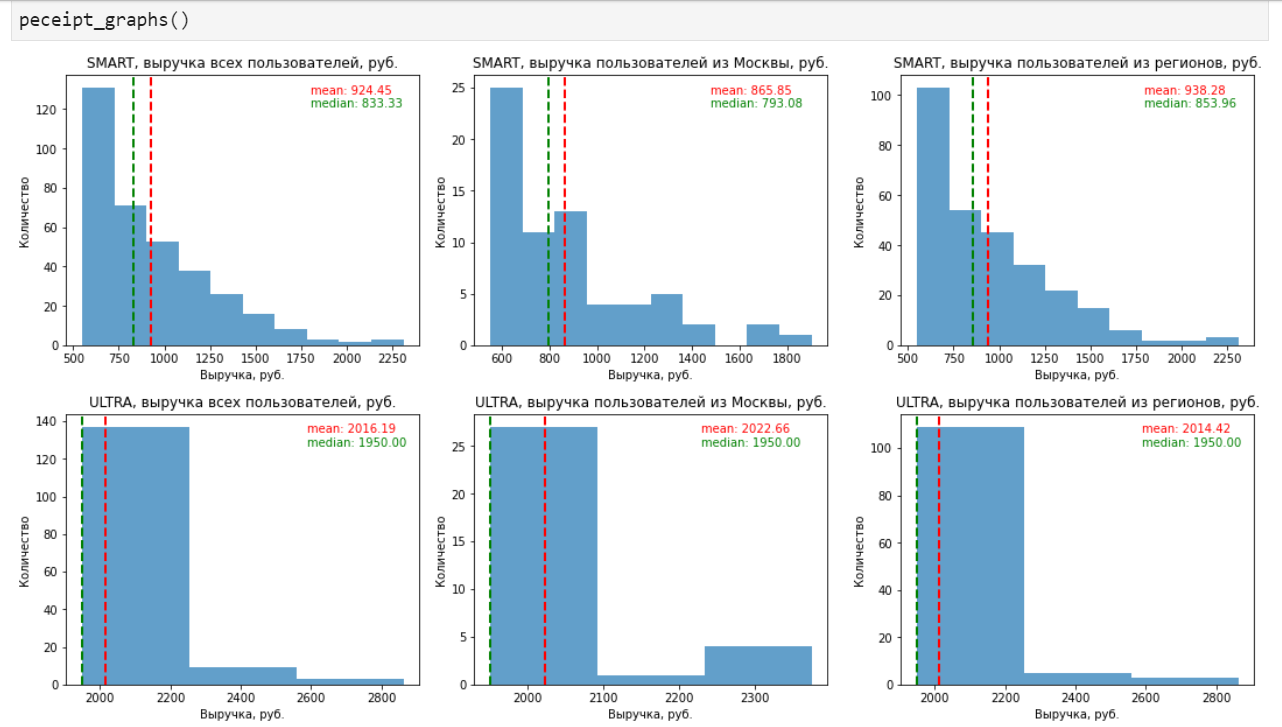

In [ ]:
def distplot(data, plot_title='', x_title='', bins=10, figsize=(16, 7)):
    '''
    Функция отрисовки гистограммы с линией распределения плотности вероятности
    '''
    with sns.axes_style('whitegrid'):
        fig, ax = plt.subplots(figsize=figsize)
        ax.set_title(plot_title)
        sns.distplot(data, ax=ax, bins=bins, axlabel=x_title)
    print()

Пример:

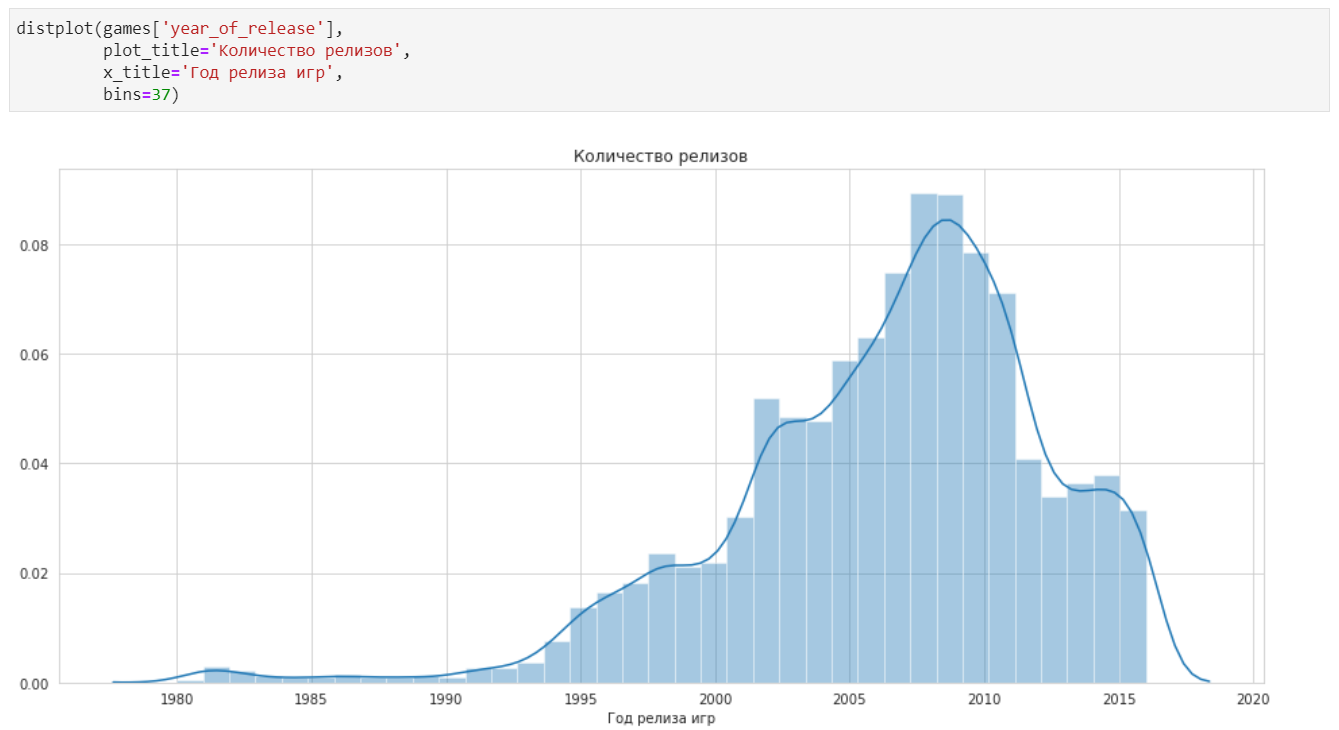

In [ ]:
def hists_plot(data, plot_title='', bins=50, figsize=(16, 10), m_row=2, m_col=2):
    '''
    Функция отрисовки матрицы гистограмм с линией распределения плотности вероятности
    '''
    
    columns = data.columns
    data_col = 0
    
    fig, axs = plt.subplots(m_row, m_col, figsize=figsize, constrained_layout=True)
    sns.set(style="whitegrid")
    
    for row in range(m_row):
        for col in range(m_col):
            axs[row][col].set_title(plot_title + columns[data_col])
            sns.distplot(data[columns[data_col]], ax=axs[row][col], bins=bins, axlabel=columns[data_col])
            data_col += 1

Пример:

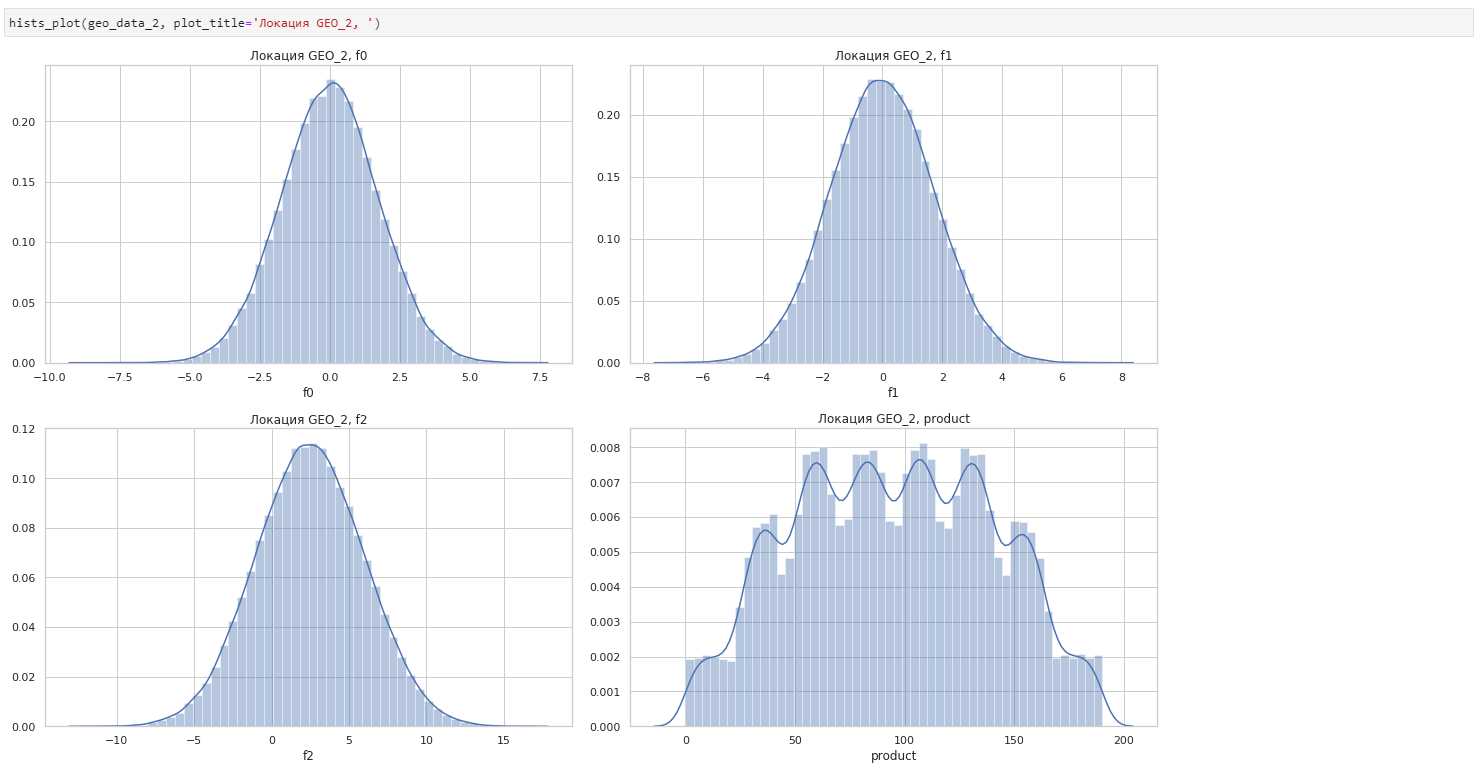

In [ ]:
def feed_hists_plot(bins=50, figsize=(16,5)):
    
    fig, axs = plt.subplots(1, 2, figsize=figsize, constrained_layout=True)
    sns.set(style="whitegrid")
    
    sns.distplot(train_data['rougher.input.feed_size'], ax=axs[0], bins=bins, kde_kws={"label": "train"})
    sns.distplot(test_data['rougher.input.feed_size'],
                 ax=axs[0], bins=bins, axlabel='Размер гранул руды', kde_kws={"label": "test"})
    
    sns.distplot(train_data['primary_cleaner.input.feed_size'], ax=axs[1], bins=bins, kde_kws={"label": "train"})
    sns.distplot(test_data['primary_cleaner.input.feed_size'],
                 ax=axs[1], bins=bins, axlabel='Размер гранул чернового концентрата', kde_kws={"label": "test"})

Пример:

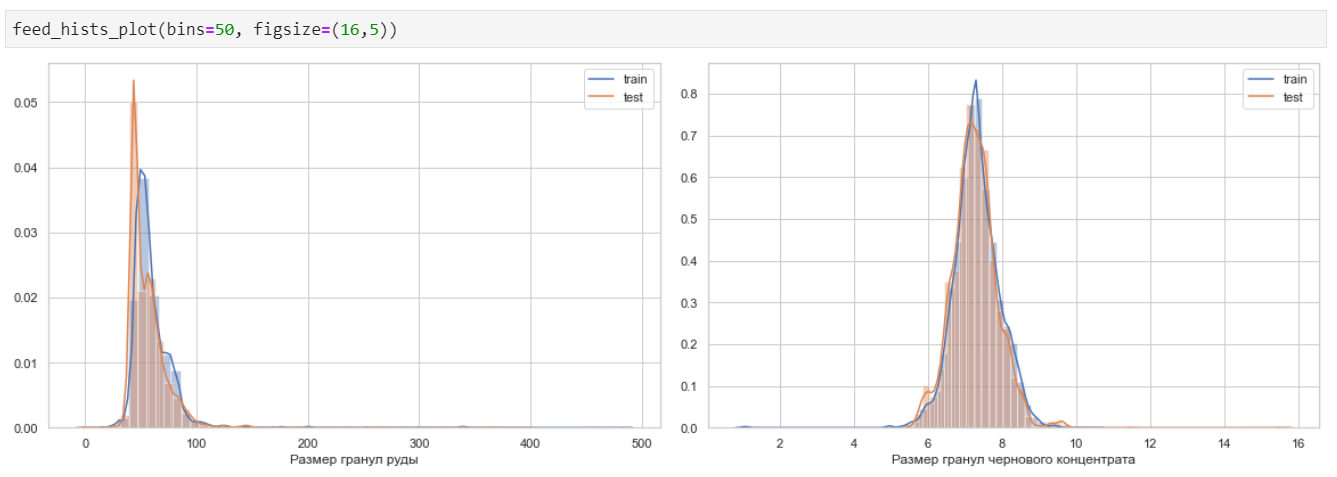

In [ ]:
def hist(col, label, bins=100, figsize=(16,5), xlim=None):
    '''
    Функция отрисовки гистограммы с линией распределения плотности вероятности и с boxplot-ом
    '''
    
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.set(style="whitegrid")
    sns.distplot(data[col], ax=ax, bins=bins, axlabel=label)
    
    ax2 = ax.twinx()
    sns.boxplot(x=data[col], ax=ax2)
    ax2.set(ylim=(-.5, 10))
    
    plt.axvline(data[col].mean(), color='green', linestyle='dashed', linewidth=2)
    tx = "mean: {:.2f}".format(data[col].mean())
    _, tx_x = plt.xlim()
    _, tx_y = plt.ylim()
    plt.text(data[col].mean()+tx_x/100, tx_y-5*tx_y/100, tx)
    
    if xlim:
        ax.set(xlim=xlim)

Пример:

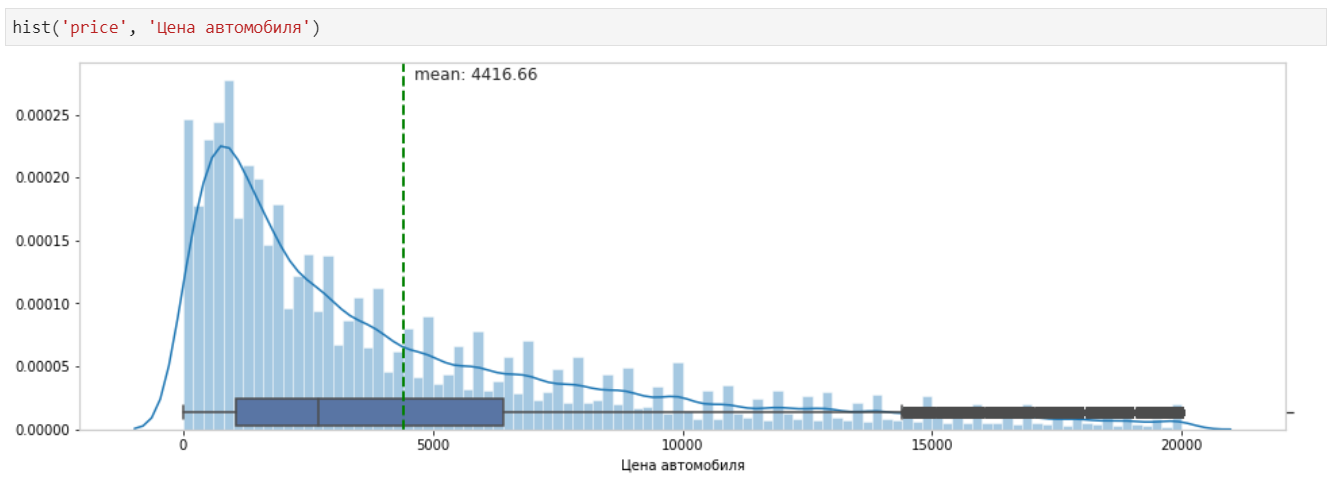

In [ ]:
def bep_hists(data, bep, bins=100, figsize=(16,5)):
    '''
    Функция отрисовки гистограмм с линией распределения плотности вероятности для предикторных значений моделей
    '''
    
    fig, axs = plt.subplots(1, 3, figsize=figsize, constrained_layout=True)
    sns.set(style="whitegrid")
    
    location = 0
    
    for i in data:
        sns.distplot(i, ax=axs[location], bins=bins, axlabel='Прогнозируемый запас скважин')        
        ax2 = axs[location].twinx()
        sns.boxplot(x=i, ax=ax2)
        ax2.set(ylim=(-.5, 10))
        if bep:
            plt.axvline(bep, color='green', linestyle='dashed', linewidth=2)
            
        axs[location].set_title('Локация geo_' + str(location))
        location += 1

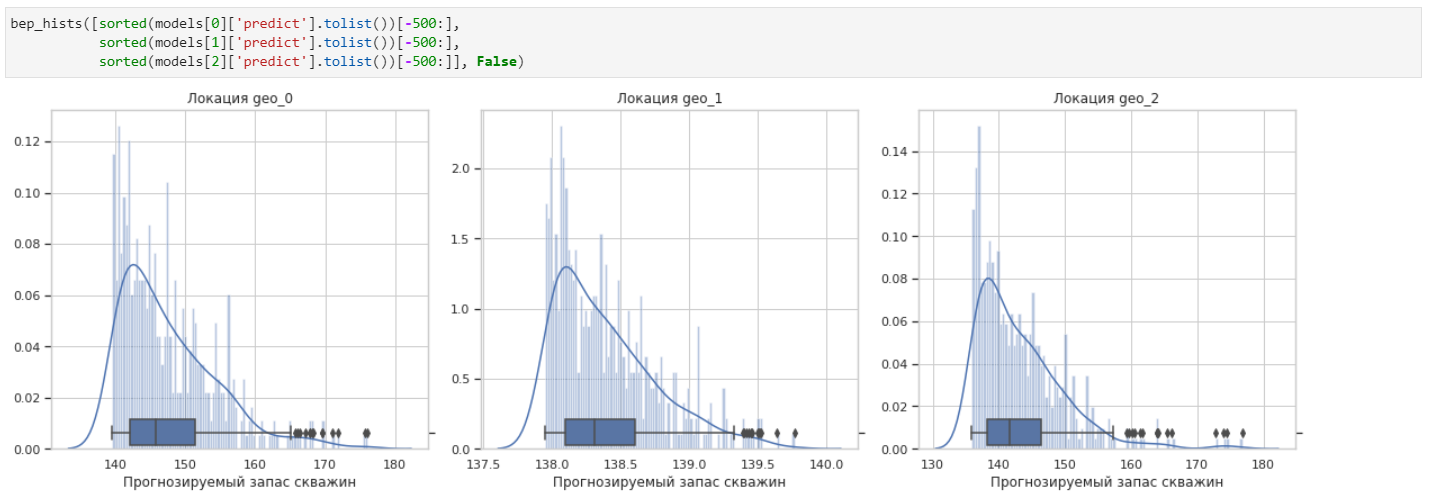

In [ ]:
def barplot(data, x='', y='', plot_title='', x_title='', y_title='', estimator=sum, figsize=(16, 7)):
    '''
    Функция отрисовки столбчатой диаграммы
    '''
    with sns.axes_style('whitegrid'):
        fig, ax = plt.subplots(figsize=figsize)
        sns.barplot(x=x, y=y,data=data, ax=ax, estimator=estimator)
        ax.set_title(plot_title)
        plt.xlabel(x_title)
        plt.ylabel(y_title)
    print()

Пример:

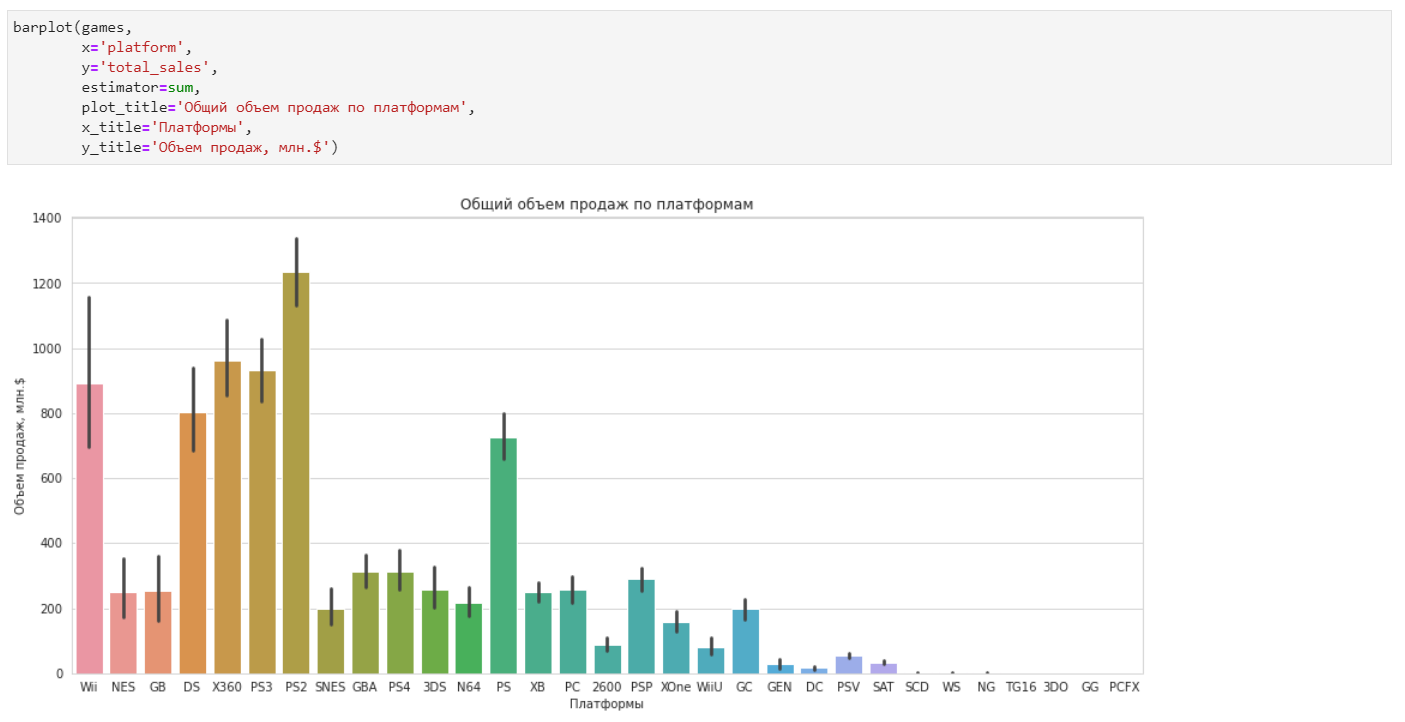

In [ ]:
def boxplot(data, x='', y='', plot_title='', x_title='', y_title='', showmeans=True, figsize=(16, 7),
            ylim=(0,2)):
    '''
    Функция отрисовки диаграммы размаха
    '''
    with sns.axes_style('whitegrid'):
        fig, ax = plt.subplots(figsize=figsize)
        sns.boxplot(x=x, y=y, data=data, ax=ax, showmeans=showmeans)
        plt.ylim(ylim)
        ax.set_title(plot_title)
        plt.xlabel(x_title)
        plt.ylabel(y_title)

Пример:

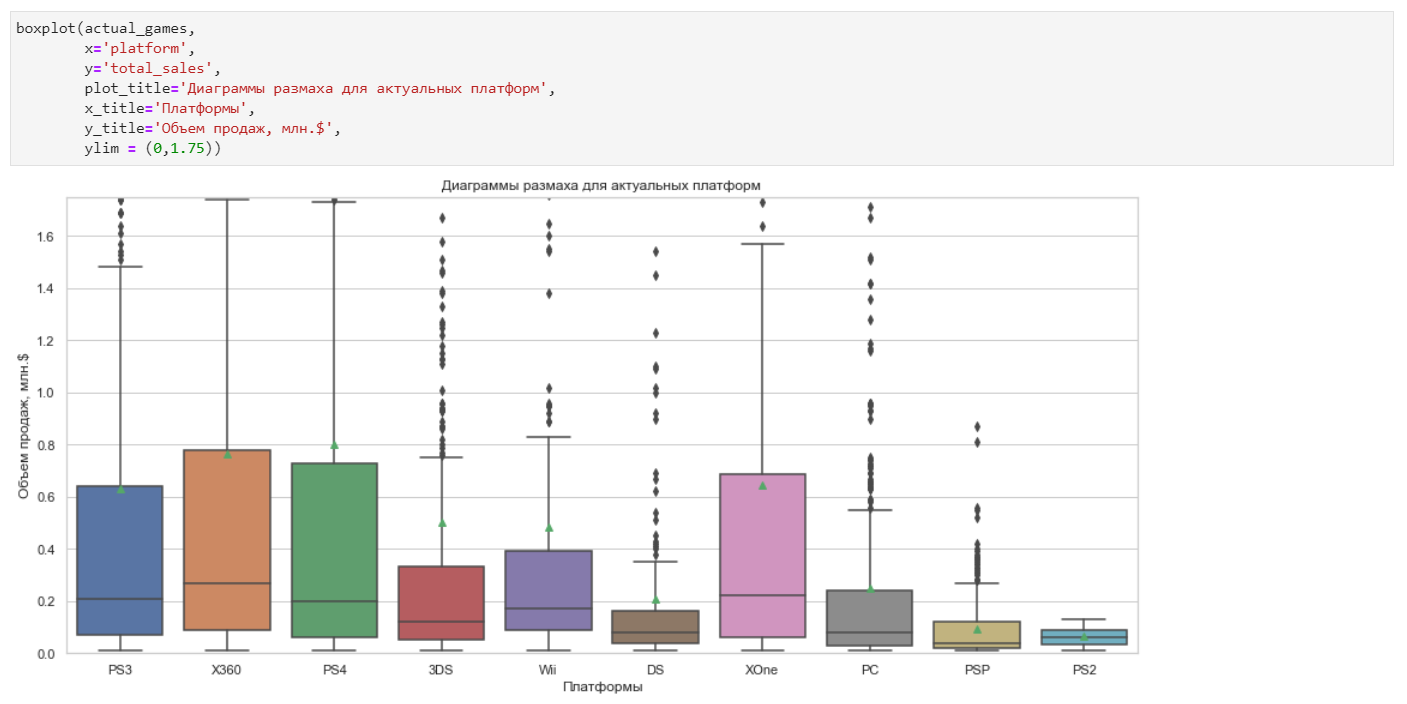

In [ ]:
def lineplot_matrix(i, j, data, title='', cells=[], xlabel='', ylabel='', figsize=(0,0)):
    '''
    Функция отрисовки матрицы линйных графиков
    '''
    fig, axs = plt.subplots(i, j, figsize=figsize, constrained_layout=True)
    sns.set(style="whitegrid")

    for row in range(i):
        for col in range(j):
            _cell = cells.pop(0)
            axs[row][col].set_title(title + _cell)
            axs[row][col].set_xlabel(xlabel)
            axs[row][col].set_ylabel(ylabel)
            sns.lineplot(data=data.loc[_cell], ax=axs[row][col]) 

Пример:

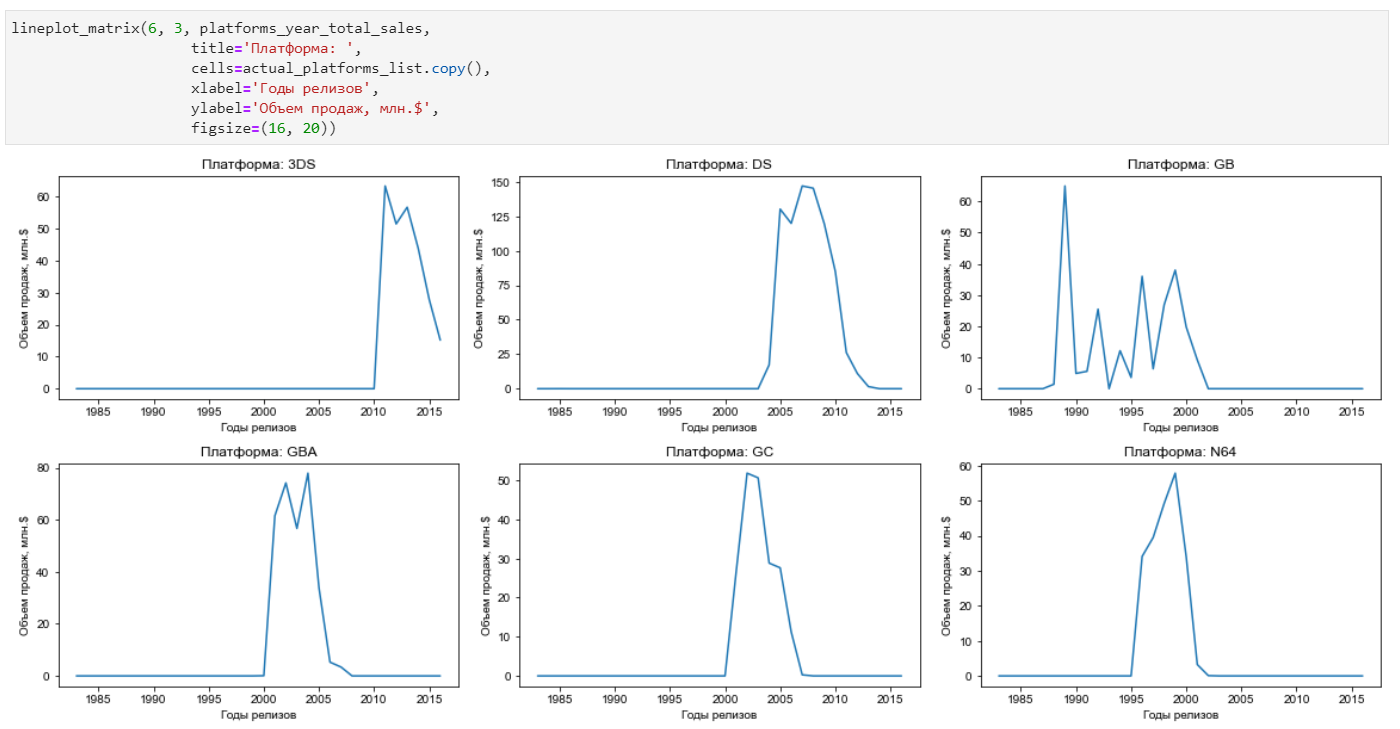

In [ ]:
def regplots_scores(platform):
    '''
    Функция отрисовки линий регрессии для выбранной платформы
    '''
    fig, axs = plt.subplots(1, 2, figsize=(16,5), constrained_layout=True)
    sns.set(style="whitegrid")
    
    sns.regplot(data=actual_games.loc[(actual_games['platform'] == platform),:], 
                x='user_score',
                y='total_sales', 
                ax=axs[0])
    axs[0].set_title('Платформа ' + platform)
    axs[0].set_xlabel('Отзывы пользователей')
    axs[0].set_ylabel('Объемы продаж, млн.$')
    
    sns.regplot(data=actual_games.loc[(actual_games['platform'] == platform),:], 
                x='critic_score',
                y='total_sales', 
                ax=axs[1])
    axs[1].set_title('Платформа ' + platform)
    axs[1].set_xlabel('Отзывы критиков')
    axs[1].set_ylabel('Объемы продаж, млн.$')
    
    if actual_games.loc[(actual_games['platform'] == platform),'user_score'].sum() != 0:
        print('Платформа ', platform, ', зависимость продаж от отзывов пользователей: ', 
              actual_games.loc[actual_games['platform'] == platform, 'total_sales']
              .corr(actual_games.loc[(actual_games['platform'] == platform),'user_score'])
              .round(3),
              sep='')
    else: print('Отзывы пользователей для платформы', platform, 'отсутствуют')

    if actual_games.loc[(actual_games['platform'] == platform),'critic_score'].sum() != 0:
        print('Платформа ', platform, ', зависимость продаж от отзывов критиков:', 
              actual_games.loc[actual_games['platform'] == platform, 'total_sales']
              .corr(actual_games.loc[(actual_games['platform'] == platform),'critic_score'])
              .round(3),
              sep='')
    else: print('Отзывы критиков для платформы', platform, 'отсутствуют')

Пример:

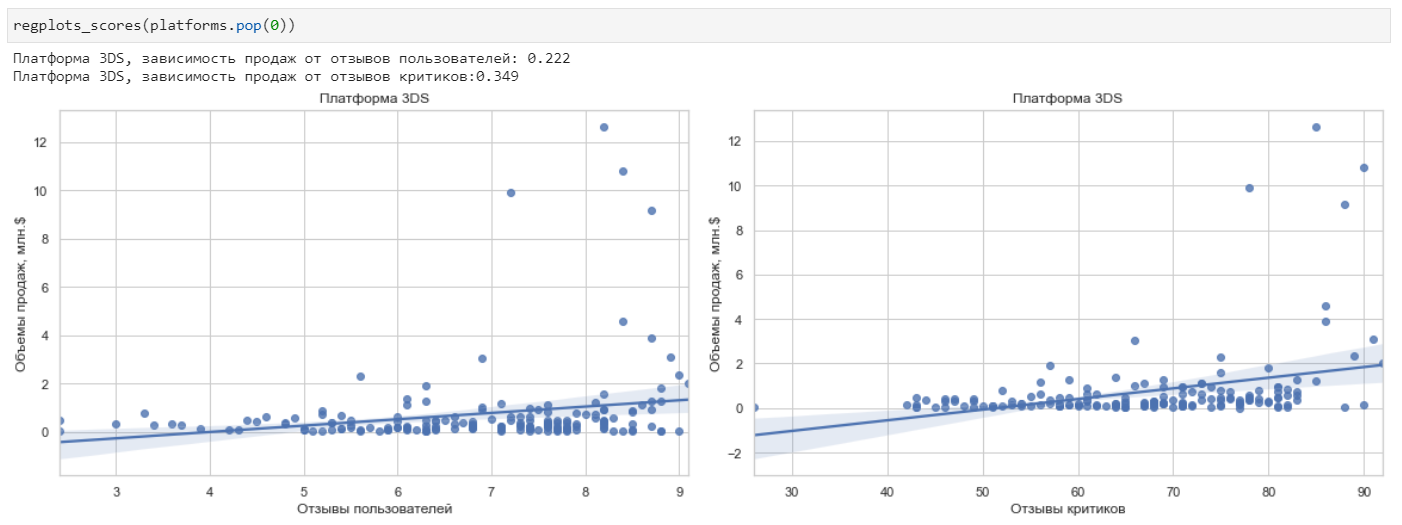

In [ ]:
def regplots_t(data):
    '''
    Функция отрисовки линий регрессии для зависимого и независимых параметров
    '''
    
    fig, axs = plt.subplots(1, 3, figsize=(16,5), constrained_layout=True)
    sns.set(style="whitegrid")
    
    sns.regplot(data=data, x='f0', y='product', ax=axs[0])
    axs[0].set_title('Взаимосвязь признаков f0, product')
    axs[0].set_xlabel('f0')
    axs[0].set_ylabel('product')
    
    sns.regplot(data=data, x='f1', y='product', ax=axs[1])
    axs[1].set_title('Взаимосвязь признаков f1, product')
    axs[1].set_xlabel('f1')
    axs[1].set_ylabel('product')
    
    sns.regplot(data=data, x='f2', y='product', ax=axs[2])
    axs[2].set_title('Взаимосвязь признаков f2, product')
    axs[2].set_xlabel('f2')
    axs[2].set_ylabel('product')

Пример:

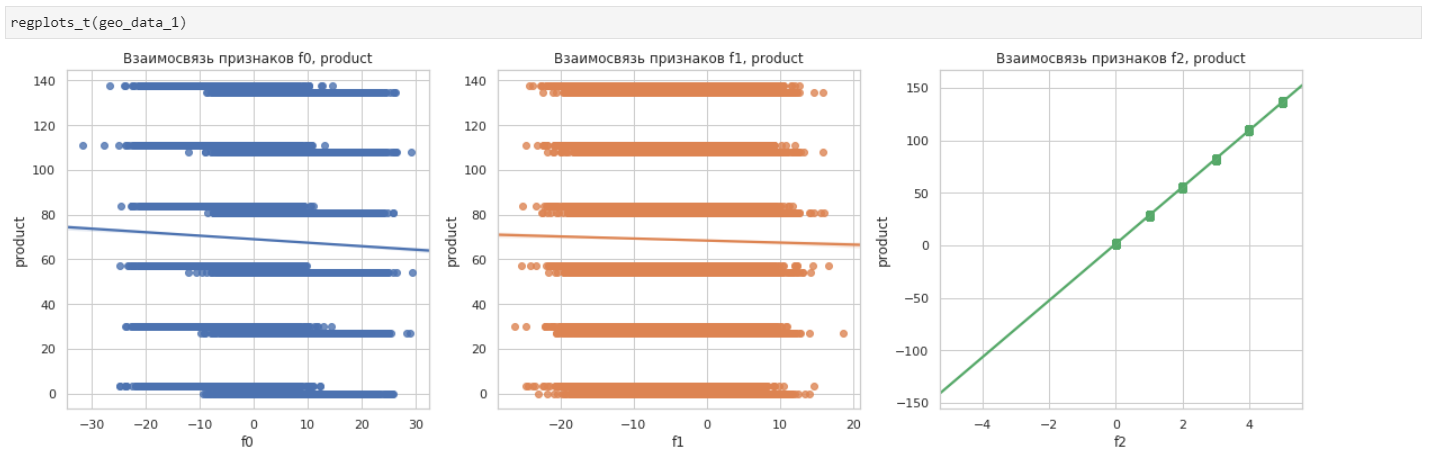

In [ ]:
def top5_pie_charts(index):
    '''
    Функция отрисовки круговых диаграм Топ-5 платфор по продажам
    '''
    fig, axs = plt.subplots(1, 3, figsize=(16,5), constrained_layout=True)
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    titles = ['Северная Америка', 'Европа' , 'Япония']
    subplot = 0
    
    for reg in regions:
        df = (actual_games.pivot_table(index=index, values=reg, aggfunc='sum')
                          .sort_values(by=reg, ascending = False)
                          .head(5))

        labels = df.index.tolist()
        sizes = df[reg].tolist()

        axs[subplot].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        axs[subplot].axis('equal')
        axs[subplot].set_title(titles[subplot])
        
        subplot += 1
        
        display(HTML(df.T.to_html()))

Пример:

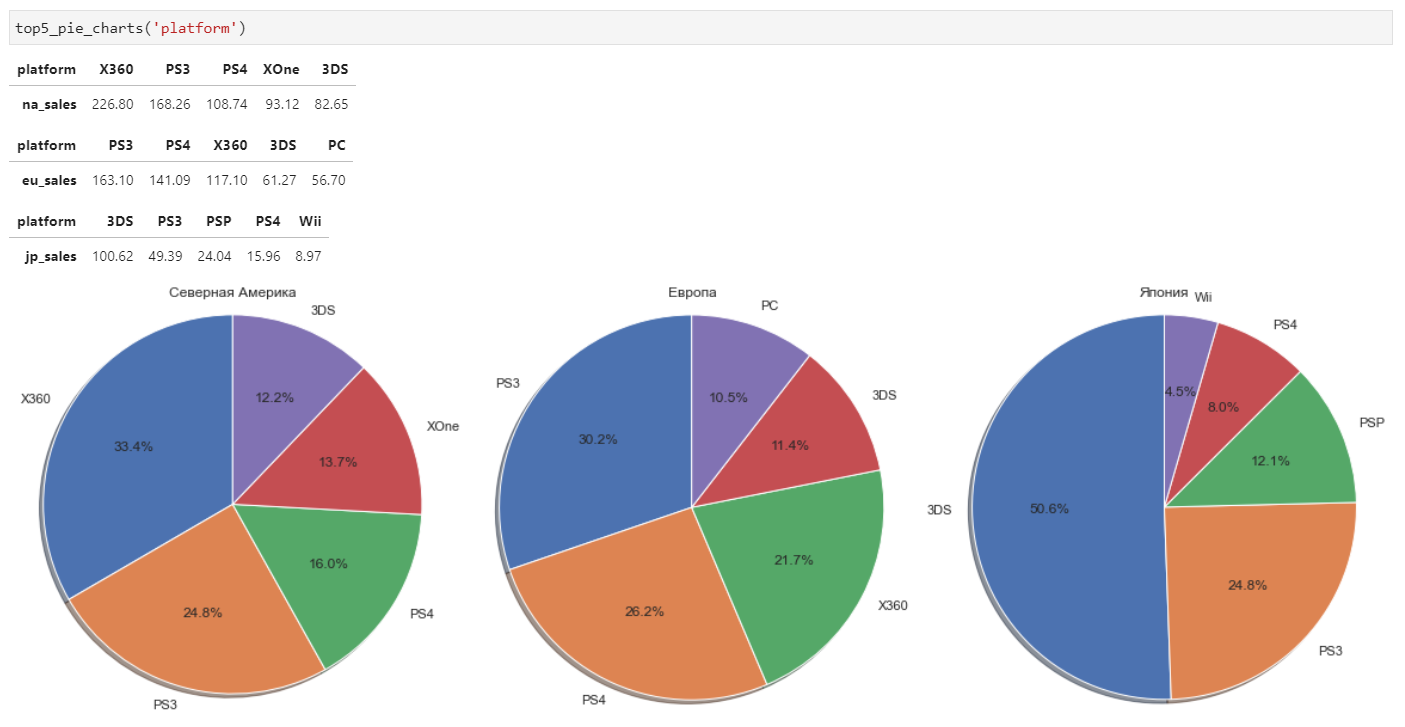

In [ ]:
def ESRB_effect():
    '''
    Функция вывода процента реализации в зависимости от рейтинга ESRB
    '''
    fig, axs = plt.subplots(1, 4, figsize=(16,5), constrained_layout=True)
    regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    titles = ['Северная Америка', 'Европа' , 'Япония', 'Осталные регионы']
    subplot = 0
    
    for reg in regions:
        df = actual_games.pivot_table(index='rating', values=reg, aggfunc='sum')

        labels = df.index.tolist()
        sizes = df[reg].tolist()

        axs[subplot].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        axs[subplot].axis('equal')
        axs[subplot].set_title(titles[subplot])
        
        subplot += 1

Пример:

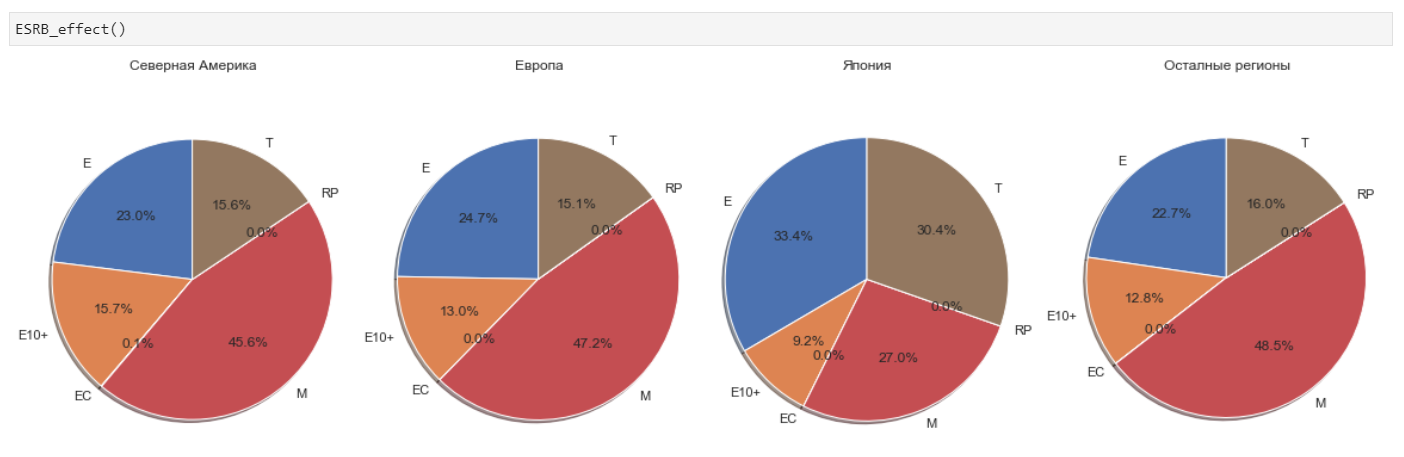

In [ ]:
def shisda_predict(size=1, span=()):
    '''
    Фунция возвращает набор предиктных ответов модели "shot in the darkness" -- "пальцем в небо"
    '''

    random.seed()
    if not span:
        return [random.random() for i in range(size)] # случайные в диапазоне от 0 до 1
    if (type(span[0]) is int) and (type(span[1]) is int):
        return [random.randint(a=span[0], b=span[1]) for i in range(size)] # случайные целые в диапазоне span
    else:
        return [random.uniform(a=span[0], b=span[1]) for i in range(size)] # случайные с плавающей точкой в диапазоне span

In [ ]:
def find_model(features_train, target_train, features_valid, target_valid,
               model_type='', goal='', max_depth=1, n_estimators=100, class_weight=None):
    '''
    Функция поиска оптимальных гиперпараметров для моделей логистической регрессии, решающего дерева и случайного леса

    model_type = log_reg
                 tree
                 forest
    goal = calc
           RP
    '''
    
    if goal == 'calc':
        
        if model_type == 'log_reg':
            
            model = LogisticRegression(random_state=1456, solver='liblinear', class_weight=class_weight)
            model.fit(features_train, target_train)
            predicted = model.predict(features_valid)
            
            ROC_AUC = roc_auc_score(target_valid, predicted)
            f1 = f1_score(target_valid,predicted)

            print("ROC-AUC:", ROC_AUC)
            print("F1 мера:", f1)
            
            return ROC_AUC, f1
            
        elif model_type == 'tree':
            
            max_ROC_AUC = [0, 0]
            max_f1 = [0, 0]

            for i in range(1, 100):
                model = DecisionTreeClassifier(random_state=1456, max_depth=i, class_weight=class_weight)

                model.fit(features_train, target_train)
                predicted = model.predict(features_valid)
                
                if roc_auc_score(target_valid, predicted) > max_ROC_AUC[0]:
                    max_ROC_AUC[0] = roc_auc_score(target_valid, predicted)
                    max_ROC_AUC[1] = i
                    
                if f1_score(target_valid, predicted) > max_f1[0]:
                    max_f1[0] = f1_score(target_valid, predicted)
                    max_f1[1] = i
        
            print('[Max ROC-AUC, max_depth]:', max_ROC_AUC)
            print('[Max F1, max_depth]:', max_f1)
            
            return max_ROC_AUC[0], max_f1[0]          

        elif model_type == 'forest':
            
            max_ROC_AUC = [0, 0, 0]
            max_f1 = [0, 0, 0]

            for i in range(5, 30):
                for j in range(1, 100, 3):
                    model = RandomForestClassifier(random_state=1456, max_depth=i, n_estimators=j,
                                               class_weight=class_weight)

                model.fit(features_train, target_train)
                predicted = model.predict(features_valid)
                
                if roc_auc_score(target_valid, predicted) > max_ROC_AUC[0]:
                    max_ROC_AUC[0] = roc_auc_score(target_valid, predicted)
                    max_ROC_AUC[1] = i
                    max_ROC_AUC[2] = j
                    
                if f1_score(target_valid, predicted) > max_f1[0]:
                    max_f1[0] = f1_score(target_valid, predicted)
                    max_f1[1] = i
                    max_f1[2] = j
        
            print('[Max ROC-AUC, max_depth, n_estimators]:', max_ROC_AUC)
            print('[Max F1, max_depth, n_estimators]:', max_f1)
            
            return max_ROC_AUC[0], max_f1[0]
        
        else: 
            print('Wrong model type')
            
    elif  goal == 'RP':
        
        if model_type == 'log_reg':
            model = LogisticRegression(random_state=1456, solver='liblinear', class_weight=class_weight)
        elif model_type == 'tree':
            model = DecisionTreeClassifier(random_state=1456, max_depth=max_depth, class_weight=class_weight)
        elif model_type == 'forest':
            model = RandomForestClassifier(random_state=1456, max_depth=max_depth, n_estimators=n_estimators, 
                                           class_weight=class_weight)
        else: 
            print('Wrong model type')
            return
        
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)

        R = recall_score(target_valid, predicted)
        P = precision_score(target_valid,predicted)
        
        print("Полнота (recall):", R)
        print("Точность (precision):", P)
        
        return R, P
            
    else:
        print('Wrong goal')

In [ ]:
def upsample(features, target, repeat):
    '''
    Функция проводящая Upsample набора данных с бинарным целевым признаком
    '''
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1456)
    
    return features_upsampled, target_upsampled

In [ ]:
def downsample(features, target, fraction):
    '''
    Функция проводящая Downsample набора данных с бинарным целевым признаком
    '''
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=1456)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=1456)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1456)
    
    return features_downsampled, target_downsampled

In [ ]:
def test_model(features_train, target_train, features_test, target_test,
               model_type='', max_depth=1, n_estimators=100, class_weight=None):
    '''
    Функция проверки модели на тестовых данных
    
    model_type = log_reg
                 tree
                 forest
    '''
    
    if model_type == 'log_reg':
        model = LogisticRegression(random_state=1456, solver='liblinear', class_weight=class_weight)
        
    elif model_type == 'tree':
        model = DecisionTreeClassifier(random_state=1456, max_depth=max_depth, class_weight=class_weight)
        
    elif model_type == 'forest':
        model = RandomForestClassifier(random_state=1456, max_depth=max_depth, n_estimators=n_estimators, 
                                       class_weight=class_weight)
        
    else: 
            print('Wrong model type')
            return
    
    model.fit(features_train, target_train)
    predicted = model.predict(features_test)
            
    print('F1-мера: {:.3f}'.format(f1_score(target_test,predicted)))
    print('ROC-AUC: {:.3f}'.format(roc_auc_score(target_test, predicted)))
    print('recall (полнота): {:.3f}'.format(recall_score(target_test, predicted)))
    print('precision (точность): {:.3f}'.format(precision_score(target_test,predicted)))

In [ ]:
fts = {0: {'f_train': None, 'f_test': None, 't_train': None, 't_test':None},
       1: {'f_train': None, 'f_test': None, 't_train': None, 't_test':None},
       2: {'f_train': None, 'f_test': None, 't_train': None, 't_test':None}}

models = {0: {'model': None, 'predict': None},
          1: {'model': None, 'predict': None},
          2: {'model': None, 'predict': None}}
    
def model_create(data, loc=0):
    '''
    Функция подготовки выборок, создание и обучения моделей, рассчет RMSE и расчётных запасов нефти
    '''
    
    features = data.drop('product', axis=1)
    target = data['product']

    fts[loc]['f_train'], fts[loc]['f_test'], fts[loc]['t_train'], fts[loc]['t_test'] = train_test_split(features, target,
                                                                                                        test_size=0.25,
                                                                                                        random_state=1457)
    models[loc]['model'] = LinearRegression()
    models[loc]['model'].fit(fts[loc]['f_train'], fts[loc]['t_train'])
    models[loc]['predict'] = pd.Series(data=models[loc]['model'].predict(fts[loc]['f_test']), index=fts[loc]['f_test'].index)
    rmse = mean_squared_error(fts[loc]['t_test'], models[loc]['predict']) ** 0.5
    
    print('RMSE модели: {:.2f} ({:.2%} от диапазона тестового целевого признака), средний предсказанный запас нефти: {:.2f}'
          .format(rmse, rmse / (fts[loc]['t_test'].max() - fts[loc]['t_test'].min()), models[loc]['predict'].mean()))